In [ ]:
import tensorflow as tf

Load and Process the data - MNIST Dataset

The task is given an image containing a digit between 0-9, you need to identify what that digit is.   

Example of Sequential API

In [ ]:
(x_train, y_train),(x_test, y_test)= tf.keras.datasets.mnist.load_data()   #tf.kerasAPI, dataset is already spilt in two parts in the collection. we just need to load it into two parts.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


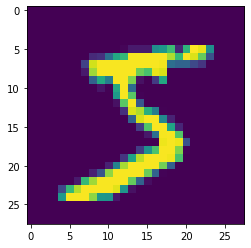

5


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

Before feeding the training data into our NN, we need to process it. 
First, we need to flatten the image from 2D to 1D.

In [ ]:
x_train=x_train.reshape(x_train.shape[0],-1)/255.0
x_test=x_test.reshape(x_test.shape[0],-1)/255.0

In [ ]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

Model Architecture

Example of Sequential API

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
#We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers.

model= Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 4.8 MB/s 


In [ ]:
import visualkeras

In [ ]:
visualkeras.layered_view(model)

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
a=model.fit(x_train,y_train,epochs=10,batch_size=1024, validation_data=(x_test,y_test))

Epoch 1/10
59/59 [==============================] - 4s 48ms/step - loss: 0.5879 - accuracy: 0.8448 - val_loss: 0.2460 - val_accuracy: 0.9309
Epoch 2/10
59/59 [==============================] - 3s 57ms/step - loss: 0.2025 - accuracy: 0.9416 - val_loss: 0.1630 - val_accuracy: 0.9522
Epoch 3/10
59/59 [==============================] - 4s 69ms/step - loss: 0.1397 - accuracy: 0.9603 - val_loss: 0.1233 - val_accuracy: 0.9624
Epoch 4/10
59/59 [==============================] - 4s 76ms/step - loss: 0.1070 - accuracy: 0.9689 - val_loss: 0.1103 - val_accuracy: 0.9663
Epoch 5/10
59/59 [==============================] - 5s 87ms/step - loss: 0.0836 - accuracy: 0.9762 - val_loss: 0.0958 - val_accuracy: 0.9699
Epoch 6/10
59/59 [==============================] - 5s 87ms/step - loss: 0.0676 - accuracy: 0.9806 - val_loss: 0.0839 - val_accuracy: 0.9752
Epoch 7/10
59/59 [==============================] - 3s 44ms/step - loss: 0.0559 - accuracy: 0.9842 - val_loss: 0.0825 - val_accuracy: 0.9748
Epoch 8/10
59

In [ ]:
model.evaluate(x_test,y_test,batch_size=32)  #Default Batch Size is 32. 

313/313 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9781


[0.07115393131971359, 0.9781000018119812]

In [ ]:
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 1s 4ms/step


array([[6.14476718e-08, 3.95481798e-08, 3.17735139e-05, ...,
        9.99648809e-01, 2.09779796e-06, 4.21311743e-05],
       [4.02072864e-08, 1.68922124e-05, 9.99976218e-01, ...,
        1.56397187e-11, 5.31929527e-06, 1.21505939e-11],
       [1.80494753e-05, 9.94287431e-01, 2.62814108e-04, ...,
        3.19352373e-03, 1.75443490e-03, 2.81326502e-05],
       ...,
       [2.82331380e-11, 3.06890902e-10, 1.93174518e-10, ...,
        1.29911905e-05, 1.13391332e-06, 1.30112472e-04],
       [3.60676355e-09, 8.00864264e-09, 1.70288024e-12, ...,
        1.36377643e-09, 1.74156841e-04, 2.55920840e-09],
       [7.73535347e-10, 9.98797225e-11, 3.99745081e-09, ...,
        4.03154897e-12, 4.60265909e-10, 6.09407594e-11]], dtype=float32)

In [ ]:
model.evaluate(x_train,y_train,batch_size=32)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286 - accuracy: 0.9929


[0.028636367991566658, 0.9928833246231079]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show()

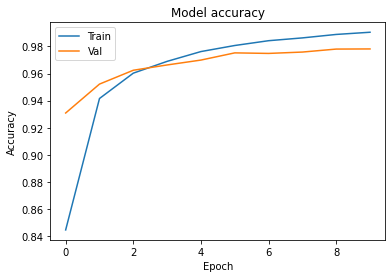

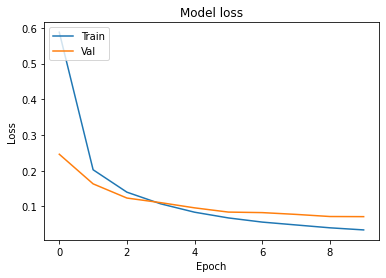

In [ ]:
plot_history(a)

Example of Functional API

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input


In [ ]:
input=Input(shape=[784,])
hidden_1=Dense(256, activation='relu')(input)
hidden_2=Dense(256, activation='relu')(hidden_1)
hidden_3=Dense(256, activation='relu')(input)
concat=Concatenate()([hidden_2,hidden_3])
output=Dense(10,activation='softmax')(concat)
model=Model(inputs=[input],outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 256)          65792       ['dense_9[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 256)          200960      ['input_1[0][0]']                
                                                                                              

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
a=model.fit(x_train,y_train,epochs=10,batch_size=1024)

Epoch 1/10
59/59 [==============================] - 3s 43ms/step - loss: 0.5160 - accuracy: 0.8615
Epoch 2/10
59/59 [==============================] - 2s 42ms/step - loss: 0.1914 - accuracy: 0.9453
Epoch 3/10
59/59 [==============================] - 3s 43ms/step - loss: 0.1361 - accuracy: 0.9614
Epoch 4/10
59/59 [==============================] - 3s 42ms/step - loss: 0.1006 - accuracy: 0.9711
Epoch 5/10
59/59 [==============================] - 2s 42ms/step - loss: 0.0789 - accuracy: 0.9772
Epoch 6/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0640 - accuracy: 0.9812
Epoch 7/10
59/59 [==============================] - 3s 42ms/step - loss: 0.0516 - accuracy: 0.9855
Epoch 8/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0418 - accuracy: 0.9884
Epoch 9/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0340 - accuracy: 0.9908
Epoch 10/10
59/59 [==============================] - 3s 44ms/step - loss: 0.0280 - accuracy: 0.9928


In [ ]:
model.evaluate(x_test,y_test,batch_size=32)

313/313 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9789


[0.06835436075925827, 0.9789000153541565]